# Machine Learning for Unstructured text assignment
Jaideep Siva Senthil


##Packages

In [ ]:
!pip install nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from wordcloud import WordCloud

# Preprocessing and evaluation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Data set

### Importing data set and creating a data frame

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Unstructure_text.ipynb to Unstructure_text.ipynb


In [ ]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


Text(0.5, 1.0, 'Count of Ratings')

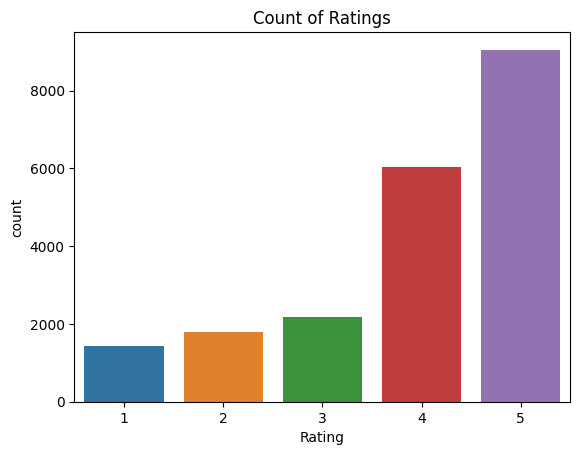

In [ ]:
sns.countplot(data=df, x='Rating').set_title('Count of Ratings')


> There appears to be some class imbalance with more positve ratings compared to negative ratings

Sentence length

<ipython-input-83-b6d0934a6d59>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='Rating', y = "Length", palette="Greens").set_title('Length of Review')


Text(0.5, 1.0, 'Length of Review')

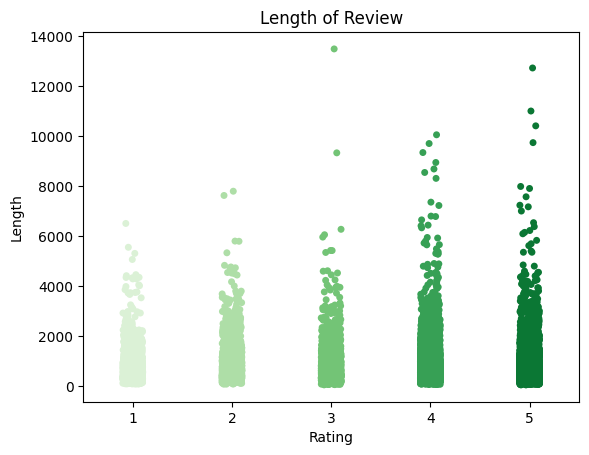

In [ ]:
df['Length'] = df['Review'].apply(len)
sns.stripplot(data=df, x='Rating', y = "Length", palette="Greens").set_title('Length of Review')

##Data preprocessing

###Converting rating to more understandable parameters

In [ ]:
def rating(score):
    if score > 3:
        return 'Good'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Bad'

In [ ]:
df['Rating'] = df['Rating'].apply(rating)

In [ ]:
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Good,593
1,ok nothing special charge diamond member hilto...,Bad,1689
2,nice rooms not 4* experience hotel monaco seat...,Neutral,1427
3,"unique, great stay, wonderful time hotel monac...",Good,600
4,"great stay great stay, went seahawk game aweso...",Good,1281


In [ ]:
length = df['Length'].sum()
print("Total number of words in the data set:", length)

Total number of words in the data set: 14853861


###Lemmetaization

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
# Function for lemmetaization
def lemmetaize(text):
    #remove punctuations and and set words to lower case
    new_txt = text.translate(str.maketrans('','',string.punctuation)).lower()

    #remove stopwords
    new_txt = [word for word in new_txt.split() if word not in stopwords.words('english')]

    #lemmatize the word
    sentence = []
    for word in new_txt:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#lemmatizing reviews in data frame
df['Review'] = df['Review'].apply(lemmetaize)

###Generating word cloud to viusalize most used words

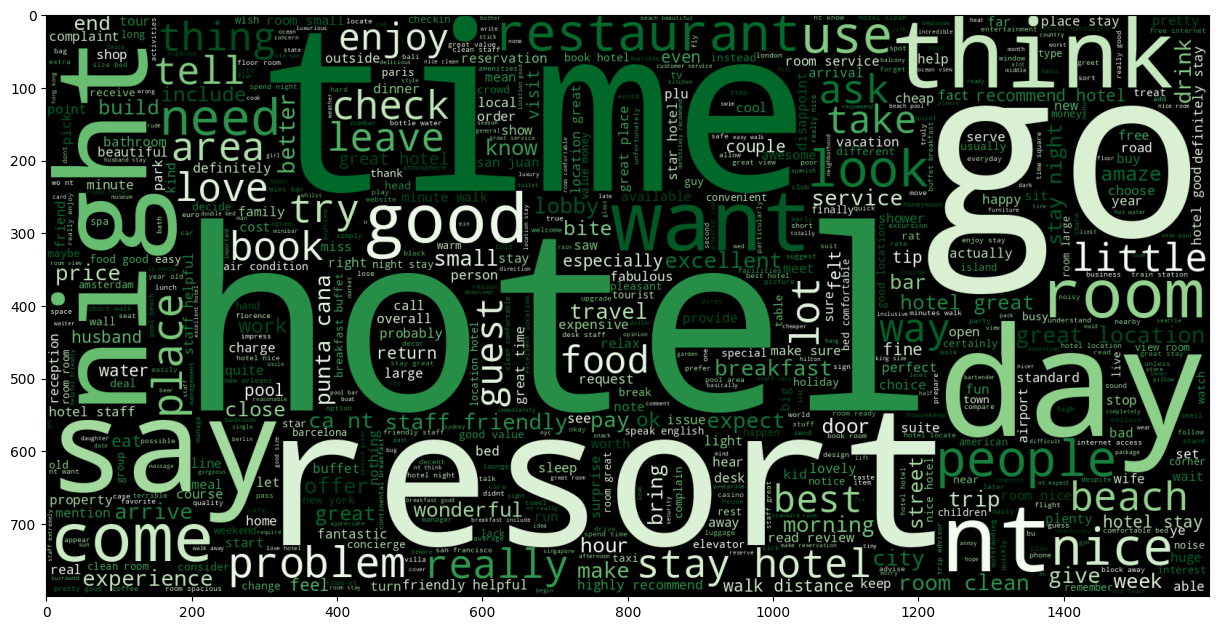

In [ ]:
plt.figure(figsize=(15,10))
word_cloud = WordCloud(max_words=700, min_font_size=8,
                height=800,width=1600,background_color="black", colormap='Greens').generate(' '.join(df['Review']))

plt.imshow(word_cloud)

##Training/ Testing models

###Train / Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Rating'], test_size=0.2)

###Tokenizataion

In [ ]:
tfid = TfidfVectorizer()
train_tfid = tfid.fit_transform(X_train)
test_tfid = tfid.transform(X_test)

In [ ]:
pickle.dump(tfid, open('tfidf.pkl', 'wb'))

###Decison Tree

In [ ]:
#Model Creation
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(train_tfid,y_train)
y_pred=clf.predict(test_tfid)

#Model Mertics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Bad       0.59      0.54      0.56       683
        Good       0.85      0.86      0.86      2992
     Neutral       0.24      0.24      0.24       424

    accuracy                           0.75      4099
   macro avg       0.56      0.55      0.55      4099
weighted avg       0.74      0.75      0.74      4099



#SVC

In [ ]:
clf = SVC()
clf.fit(train_tfid,y_train)
y_pred=clf.predict(test_tfid)

#Model Mertics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Bad       0.82      0.77      0.79       683
        Good       0.87      0.99      0.93      2992
     Neutral       0.61      0.11      0.19       424

    accuracy                           0.86      4099
   macro avg       0.77      0.62      0.64      4099
weighted avg       0.84      0.86      0.83      4099



Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter = 2000)
clf.fit(train_tfid,y_train)
y_pred=clf.predict(test_tfid)

#Model Mertics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Bad       0.84      0.77      0.80       683
        Good       0.89      0.98      0.93      2992
     Neutral       0.52      0.21      0.30       424

    accuracy                           0.86      4099
   macro avg       0.75      0.65      0.68      4099
weighted avg       0.84      0.86      0.84      4099



KNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(train_tfid,y_train)
y_pred=clf.predict(test_tfid)

#Model Mertics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Bad       0.82      0.40      0.54       683
        Good       0.79      0.99      0.88      2992
     Neutral       0.40      0.02      0.04       424

    accuracy                           0.79      4099
   macro avg       0.67      0.47      0.49      4099
weighted avg       0.76      0.79      0.74      4099



Saving Logistic regression to predict

In [ ]:
log_reg_model = LogisticRegression(max_iter= 2000)
log_reg_model.fit(train_tfid, y_train)

pred = log_reg_model.predict(test_tfid)

In [ ]:
pickle.dump(log_reg_model, open('ml_model.pkl', 'wb'))

In [ ]:
ml = pickle.load(open('ml_model.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))
def ml_predict(text):
    clean_text = lemmetaize(text)
    tfid_matrix = tfidf.transform([clean_text])
    pred_proba = ml.predict_proba(tfid_matrix)
    idx = np.argmax(pred_proba)
    pred = ml.classes_[idx]

    return pred, pred_proba[0][idx]

Prediciton using log_reg

In [ ]:
text = input("Please enter a review: ")
print(ml_predict(text))

Please enter a review: I loved this hotel
('Good', 0.998993070643764)


In [ ]:
text = input("Please enter a review: ")
print(ml_predict(text))

Please enter a review: it was an okay room
('Neutral', 0.5276741586694066)


In [ ]:
text = input("Please enter a review: ")
print(ml_predict(text))

Please enter a review: bad room, smelled very bad
('Bad', 0.903856052668506)
